**Project title:** Healthcare - Persistency of a drug<br>
**Group name:** DG_team_project_PL-RO-KSA-EGY<br>
**Github repo:** [https://github.com/Omar-Safwat/HealthCare_project](https://github.com/Omar-Safwat/HealthCare_project)<br>
**Week:** 11<br>


#### Team members
    
| Name | Specialization | Country | Email |
| :--- | --- | --- | --- | 
| Ms. Larisa Popa | Data Science | Romania |Larisapopa4@gmail.com |
| Ms. Afshan Hashmi | Data Science | Kingdom of Saudi Arabia | afshanhashmi786@gmail.com |
| Mr. Omar Safwat | Data Science | Egypt | omarksafwat@gmail.com |
| Mr. Roger Burek-Bors | Data Science | Poland | roger.burek-bors@hotmail.com |

In [10]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
%matplotlib inline
print("Libraries loaded")

Libraries loaded


In [11]:
# Loading dataset cleaned for EDA
df = pd.read_csv('clean_data.csv')
print("Dataset loaded")

Dataset loaded


In [12]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df.shape

(3424, 69)

**Hypothesis no 1: Since pulmonary NTM disease diagnosis requires a high-resolution CT scan of the lungs, features related to dexa scan (i.e. Dexa_Freq_During_Rx, Dexa_During_Rx) should contribute to drug persistency classification?**

In [14]:
df_dexa = df[['Dexa_Freq_During_Rx', 'Dexa_During_Rx']]
df_dexa

,Dexa_Freq_During_Rx,Dexa_During_Rx
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3419,0,0
3420,0,0
3421,7,1
3422,0,0


In [15]:
df_dexa.groupby(['Dexa_Freq_During_Rx']).count()

,Dexa_During_Rx
Dexa_Freq_During_Rx,
0,2488
1,24
2,24
3,46
4,68
5,114
6,107
7,93
8,71


In [16]:
df_dexa.groupby(['Dexa_During_Rx']).count()

,Dexa_Freq_During_Rx
Dexa_During_Rx,
0,2488
1,936


Unfortunately, after removing outliers remaining data related to dexa scan is useless for modelling. Both features Dexa_Freq_During_Rx and Dexa_During_Rx give 100% negative. These features should not contribute to modeling.

**Hypothesis no 2: Features associated with “Risk” in data set are very important classifier of drug persistency?**

In [17]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [27]:
df_risks = df[['Persistency_Flag', 'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Change_Risk_Segment', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Family_History_Of_Osteoporosis', 'Risk_Vitamin_D_Insufficiency',
       'Count_Of_Risks']]
df_risks

,Persistency_Flag,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx,Change_Risk_Segment,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Vitamin_D_Insufficiency,Count_Of_Risks
0,Persistent,VLR_LR,VLR_LR,No change,0,0,0,0,0
1,Non-Persistent,VLR_LR,VLR_LR,No change,0,0,0,0,0
2,Non-Persistent,HR_VHR,HR_VHR,No change,0,0,0,0,2
3,Non-Persistent,HR_VHR,HR_VHR,No change,1,0,0,0,1
4,Non-Persistent,HR_VHR,HR_VHR,No change,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3419,Persistent,VLR_LR,VLR_LR,No change,0,0,0,1,1
3420,Persistent,HR_VHR,HR_VHR,No change,0,0,0,0,0
3421,Persistent,VLR_LR,HR_VHR,Worsened,0,0,0,1,1
3422,Non-Persistent,VLR_LR,VLR_LR,Worsened,0,0,0,0,0


In [28]:
df_risks2 = df_risks[['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']]
df_risks2

,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx
0,VLR_LR,VLR_LR
1,VLR_LR,VLR_LR
2,HR_VHR,HR_VHR
3,HR_VHR,HR_VHR
4,HR_VHR,HR_VHR
...,...,...
3419,VLR_LR,VLR_LR
3420,HR_VHR,HR_VHR
3421,VLR_LR,HR_VHR
3422,VLR_LR,VLR_LR


In [29]:
df_risks2['comparison'] = np.where(df_risks2['Risk_Segment_Prior_Ntm'] == df_risks2['Risk_Segment_During_Rx'], 1, 0)

<ipython-input-29-3e34765b03a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risks2['comparison'] = np.where(df_risks2['Risk_Segment_Prior_Ntm'] == df_risks2['Risk_Segment_During_Rx'], 1, 0)


In [30]:
df_risks2.groupby(['comparison']).count()

,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx
comparison,,
0,153,153
1,3271,3271


Features: "Risk_Segment_Prior_Ntm" and "Risk_Segment_During_Rx" have nearly same values. Difference between this 2 features is around 3%. Therefore suggestion is to take only one of this features for modeling.

In [31]:
df_risks3 = df_risks.groupby(['Persistency_Flag']).sum()
df_risks3

,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Vitamin_D_Insufficiency,Count_Of_Risks
Persistency_Flag,,,,,
Non-Persistent,338,265,225,954,2497
Persistent,306,205,133,682,1747


<AxesSubplot:ylabel='Persistency_Flag'>

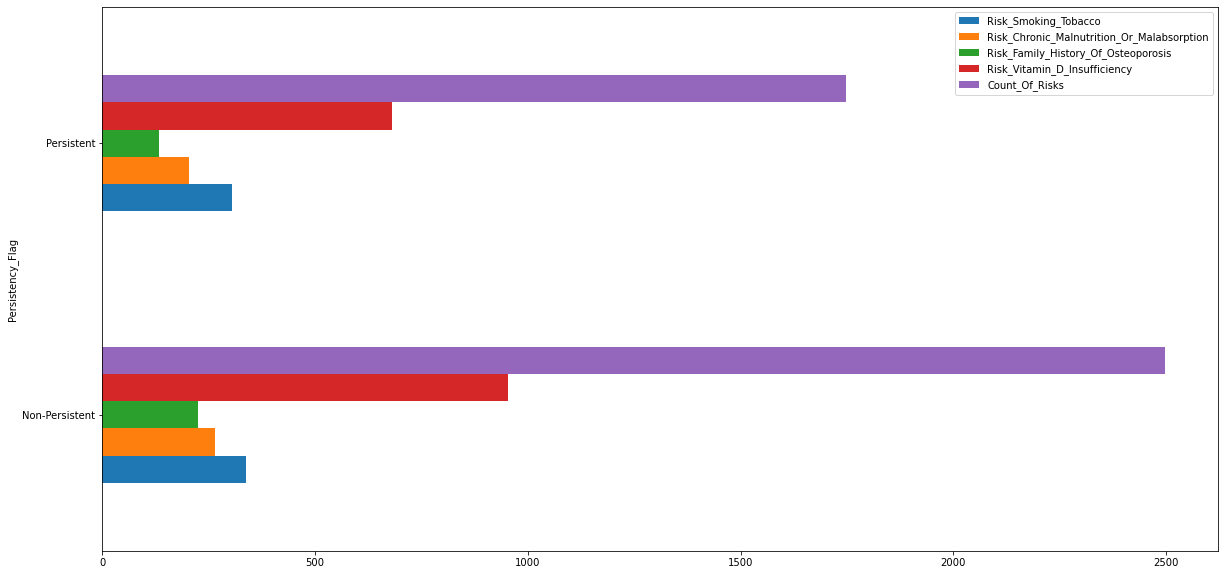

In [32]:
df_risks3.plot.barh(figsize=(20,10))

For modeling should be taken all of the features from df_risks apart “Risk_Segment_During_Rx_labels”.

**Hypothesis no 3: Effects of Demographics on persistency of drugs?**

<AxesSubplot:xlabel='Age_Bucket', ylabel='count'>

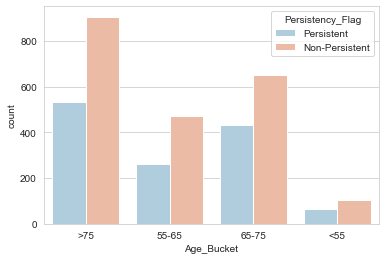

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Age_Bucket',hue='Persistency_Flag',data=df,palette='RdBu_r')

#### Result Older patients are more persistent

<AxesSubplot:xlabel='Region', ylabel='count'>

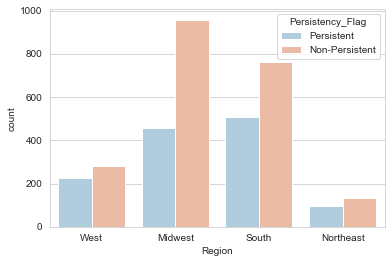

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Region',hue='Persistency_Flag',data=df,palette='RdBu_r')

#### Result: People from south is more Persistent followed by midwest

#### IDNs are large healthcare delivery organizations that either own or manage multiple points of patient care - from hospitals to physician practices to long term care facilities, and everything in between. 

<AxesSubplot:xlabel='Idn_Indicator', ylabel='count'>

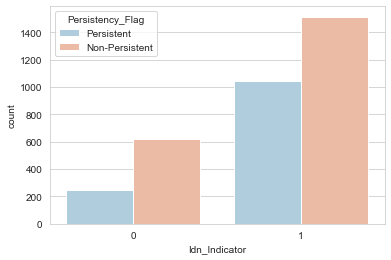

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Idn_Indicator',hue='Persistency_Flag',data=df,palette='RdBu_r')

#### Result: Patients associated with IDN are more persistent as compared to others

**Hypothesis no 4: Effects of provider attributes on the persistency?**

<AxesSubplot:xlabel='Ntm_Speciality', ylabel='count'>

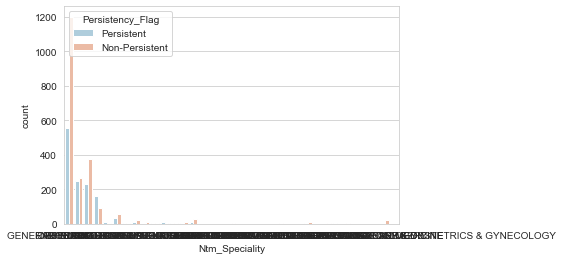

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Ntm_Speciality',hue='Persistency_Flag',data=df,palette='RdBu_r')

#### Visualizing as percentage

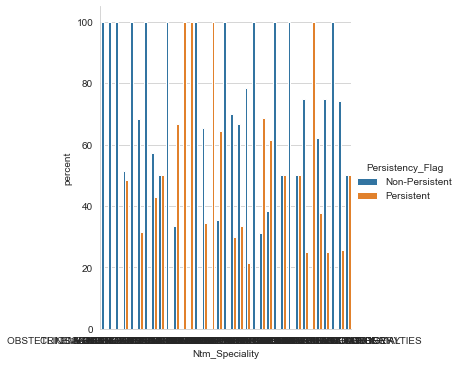

In [37]:
x,y = 'Ntm_Speciality', 'Persistency_Flag'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### Result 2: Oncology followed by Endocrinology drugs are more persistent¶

#### In general terms Cancer patients are more persistent in taking medicines followed by diabetes and thyroid patient

**Hypothesis no 5: Effects of Glucose record During Rx?**

<AxesSubplot:xlabel='Gluco_Record_During_Rx', ylabel='count'>

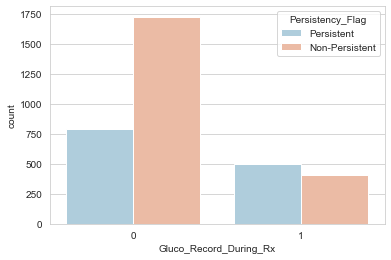

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Gluco_Record_During_Rx',hue='Persistency_Flag',data=df,palette='RdBu_r')

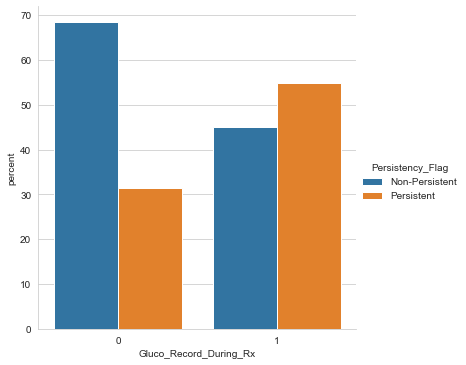

In [39]:
x,y = 'Gluco_Record_During_Rx', 'Persistency_Flag'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### Result When glucose record is considered during RX persistency increases from 18 to 38 %

**Hypothesis no 7: Most frequent risks?**

D:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count_Of_Risks', ylabel='count'>

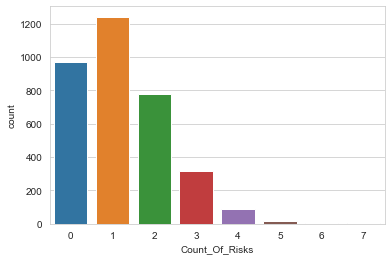

In [40]:
sns.countplot(df['Count_Of_Risks'])

D:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Segment_During_Rx', ylabel='count'>

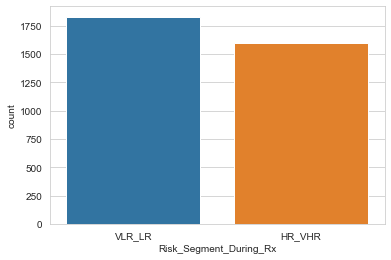

In [41]:
sns.countplot(df['Risk_Segment_During_Rx'])

D:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Segment_Prior_Ntm', ylabel='count'>

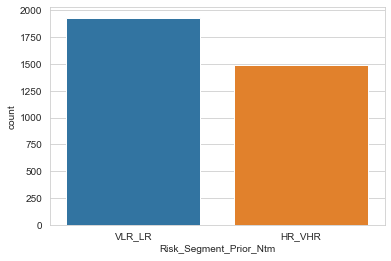

In [42]:
sns.countplot(df['Risk_Segment_Prior_Ntm'])

## Investigating the effect of Comorbidities on Persistence

In [43]:
#Preparing dataset for EDA
df_eda_omar = df.filter(regex='^Comorb*|^Adherent_Flag$|^Persistency_Flag$').copy()
#Restoring all columns back to object type.
for col in df_eda_omar.columns[2:]:
    df_eda_omar[col] = df_eda_omar[col].map({0:'N', 1:'Y'})
df_eda_omar['Adherent_Flag'].value_counts()

Adherent        3251
Non-Adherent     173
Name: Adherent_Flag, dtype: int64

In [44]:
#Filter data variables related to comorbidity
print(f'Investigating Comorbidity and Adherence accounts for {df_eda_omar.shape[1]} variables out of 67')
columns_map = {}
columns_decode = {}
for col in df_eda_omar.columns:
    if str(df_eda_omar[col].dtype) == 'object':  #If it's a categorical variable
        val_map = {}
        val_decode = {}
        mapped_value = 0
        for idx, val in enumerate(df_eda_omar[col].unique()): 
            not_na = True
            if type(val) == float:
                not_na = (np.isnan(val) != True)
            if  not_na == True: #If the value is not NaN add it to the mapping
                val_map[val] = mapped_value 
                val_decode[mapped_value] = val
                mapped_value += 1
            columns_map[col] = val_map
            columns_decode[col] = val_decode

Investigating Comorbidity and Adherence accounts for 16 variables out of 67


In [45]:
#Descriptive analysis
pd.concat([df_eda_omar.describe(), 
           pd.DataFrame({'percent': df_eda_omar.describe().loc['freq'] * 100 / len(df_eda_omar)}).transpose()])

,Persistency_Flag,Adherent_Flag,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Non-Persistent,Adherent,N,N,N,N,N,N,N,N,N,N,Y,N,N,N
freq,2135,3251,1891,1911,2072,2331,2425,2633,2607,2645,2747,2906,1765,2507,2775,2794
percent,62.353972,94.94743,55.227804,55.811916,60.514019,68.078271,70.823598,76.898364,76.139019,77.248832,80.227804,84.871495,51.547897,73.218458,81.045561,81.600467


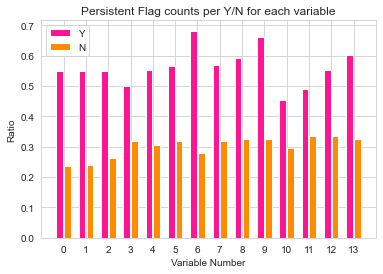

In [46]:
#Renaming columns to shorter names with initials
import string
table = str.maketrans('', '', string.ascii_lowercase)
new_names = [i.translate(table).rstrip('_') for i in df_eda_omar.columns]
new_names_encode = dict(zip(df_eda_omar.columns, new_names))
new_names_decode = dict(zip(new_names, df_eda_omar.columns))
df_eda_omar = df_eda_omar.rename(columns=new_names_encode)

#Plotting counts of persistent and non persistent flags for "Y" labeled comorb
fig1, ax1 = plt.subplots()

Y_persist_height=[]
N_persist_height=[]
#Calculate Counts of persistent flags for each variable
for col_name, col_val in df_eda_omar.loc[:, 'C_E_F_S_F_M_N':].iteritems():
    #Persistent flag count is scaled by the count of Yes flags.
    Y_persist_height.append(pd.crosstab(index=df_eda_omar['P_F'], columns=col_val).loc['Persistent', 'Y'] / col_val.value_counts()['Y'])
    #Persistent flag count is scaled by the count of No flags.
    N_persist_height.append(pd.crosstab(index=df_eda_omar['P_F'], columns=col_val).loc['Persistent', 'N'] / col_val.value_counts()['N']) 

x = np.arange(len(df_eda_omar.columns)-2)
ax1.bar(x=x-0.35/2, height=Y_persist_height, width=0.3, label='Y', color='deeppink') 
ax1.bar(x=x+0.35/2, height=N_persist_height, width=0.3, label='N', color='darkorange')

ax1.set_title('Persistent Flag counts per Y/N for each variable')
ax1.set_xticks(x)
ax1.set_ylabel('Ratio')
ax1.set_xlabel('Variable Number')
plt.legend(loc='best')

In [47]:
#Performing Chi-Square, test of independence
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def independence_test(table):
    # interpret test-statistic
    stat, p, dof, expected = chi2_contingency(table)
    # interpret p-value
    alpha = 0.05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        
for col_name, col_val in df_eda_omar.loc[:, 'C_E_F_S_F_M_N':].iteritems():
    table = pd.crosstab(index=df_eda_omar['P_F'], columns=col_val)
    print('Testing Dependency of Persistency on ', new_names_decode[col_name])
    independence_test(table)
    print('')

Testing Dependency of Persistency on  Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Encounter_For_Immunization
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Vitamin_D_Deficiency
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Long_Term_Current_Drug_Therapy
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
Dependent (reject H0)

Testing Dependency of Persistency on  Comorb_Personal_History_Of_Other_Diseases_And_Conditions
Dependent (rej

Text(0, 0.5, 'Ratio')

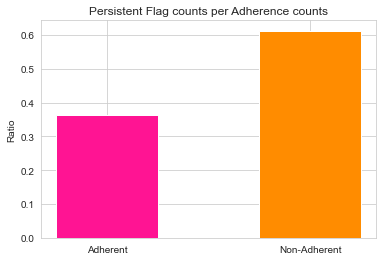

In [48]:
#Plotting Persistency flags against adherence
fig2, ax2 = plt.subplots()

adherent_persist_height= pd.crosstab(index=df_eda_omar['P_F'], columns=df_eda_omar['A_F']).loc['Persistent', 'Adherent'] / df_eda_omar['A_F'].value_counts()['Adherent']
non_adherent_persist_height = pd.crosstab(index=df_eda_omar['P_F'], columns=df_eda_omar['A_F']).loc['Persistent', 'Non-Adherent'] / df_eda_omar['A_F'].value_counts()['Non-Adherent']

x = np.array([1, 2])
ax2.bar(x=x[0], height=adherent_persist_height, width=0.5, color='deeppink') 
ax2.bar(x=x[1], height=non_adherent_persist_height, width=0.5, color='darkorange')

ax2.set_title('Persistent Flag counts per Adherence counts')
ax2.set_xticks(x)
ax2.set_xticklabels(['Adherent', 'Non-Adherent'])
ax2.set_ylabel('Ratio')

In [49]:
table = pd.crosstab(index=df_eda_omar['P_F'], columns=df_eda_omar['A_F'])
print('Testing Dependency of Persistency on Adherence')
independence_test(table)

Testing Dependency of Persistency on Adherence
Dependent (reject H0)
